In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest,f_classif

In [5]:
data=pd.read_csv('credit.csv')

In [6]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [7]:
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [9]:
data.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
786,unknown,22,good,furniture/appliances,2675,500 - 1000 DM,> 7 years,3,4,40,none,own,1,skilled,1,no,no
670,unknown,24,critical,business,4139,100 - 500 DM,1 - 4 years,3,3,27,none,own,2,unskilled,1,yes,no
645,unknown,36,poor,business,7980,unknown,< 1 year,4,4,27,none,rent,2,skilled,1,yes,yes
104,unknown,12,good,car,2445,unknown,< 1 year,2,4,26,none,rent,1,skilled,1,yes,no
634,1 - 200 DM,24,good,car,1355,< 100 DM,< 1 year,3,4,25,none,own,1,unskilled,1,yes,yes
62,1 - 200 DM,36,perfect,business,1953,< 100 DM,> 7 years,4,4,61,none,other,1,management,1,yes,yes
120,< 0 DM,21,good,furniture/appliances,1835,< 100 DM,1 - 4 years,3,2,25,none,own,2,skilled,1,yes,yes
153,1 - 200 DM,24,critical,car,7758,> 1000 DM,> 7 years,2,4,29,none,rent,1,skilled,1,no,no
357,unknown,36,poor,furniture/appliances,4463,< 100 DM,1 - 4 years,4,2,26,none,own,2,management,1,yes,yes
161,unknown,18,critical,car,1055,< 100 DM,< 1 year,4,1,30,none,own,2,skilled,1,no,no


In [10]:
data.shape

(1000, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [14]:
rep_obj=data.select_dtypes(include=['object']).columns?

Object `columns` not found.


In [16]:
rep_obj=data.select_dtypes(include=['object']).columns

In [20]:
for i in rep_obj:
    data[i]=data[i].astype("category")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [22]:
data.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [24]:
for i in data.columns:
    print(i," :",sum( (data[i]==":" ) | (data[i]==";" ) | (data[i]=="?" ) | (data[i]=="-") ))

checking_balance  : 0
months_loan_duration  : 0
credit_history  : 0
purpose  : 0
amount  : 0
savings_balance  : 0
employment_duration  : 0
percent_of_income  : 0
years_at_residence  : 0
age  : 0
other_credit  : 0
housing  : 0
existing_loans_count  : 0
job  : 0
dependents  : 0
phone  : 0
default  : 0


In [27]:
from sklearn.preprocessing import LabelEncoder


In [29]:
label=["checking_balance","credit_history","savings_balance","employment_duration","phone","default"]
oneHotCols=["purpose","housing","other_credit","job"]

In [32]:
data[oneHotCols]

,purpose,housing,other_credit,job
0,furniture/appliances,own,none,skilled
1,furniture/appliances,own,none,skilled
2,education,own,none,unskilled
3,furniture/appliances,other,none,skilled
4,car,other,none,skilled
...,...,...,...,...
995,furniture/appliances,own,none,unskilled
996,car,own,none,management
997,furniture/appliances,own,none,skilled
998,furniture/appliances,other,none,skilled


In [34]:
data[label]

,checking_balance,credit_history,savings_balance,employment_duration,phone,default
0,< 0 DM,critical,unknown,> 7 years,yes,no
1,1 - 200 DM,good,< 100 DM,1 - 4 years,no,yes
2,unknown,critical,< 100 DM,4 - 7 years,no,no
3,< 0 DM,good,< 100 DM,4 - 7 years,no,no
4,< 0 DM,poor,< 100 DM,1 - 4 years,no,yes
...,...,...,...,...,...,...
995,unknown,good,< 100 DM,4 - 7 years,no,no
996,< 0 DM,good,< 100 DM,1 - 4 years,yes,no
997,unknown,good,< 100 DM,> 7 years,no,no
998,< 0 DM,good,< 100 DM,1 - 4 years,yes,yes


In [36]:
for i in label:
    scaler=LabelEncoder()
    data[i]=scaler.fit_transform(data[i])

In [40]:
data=pd.get_dummies(data,drop_first=True,columns=oneHotCols)

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
checking_balance,1000.0,1.582,1.253334,0.0,0.0,1.0,3.00,3.0
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,1.070,1.059350,0.0,0.0,1.0,1.00,4.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings_balance,1000.0,2.145,1.111400,0.0,2.0,2.0,2.00,4.0
employment_duration,1000.0,1.525,1.344315,0.0,0.0,1.0,3.00,4.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0


In [46]:
data.corr().style.background_gradient('coolwarm')

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,housing_own,housing_rent,other_credit_none,other_credit_store,job_skilled,job_unemployed,job_unskilled
checking_balance,1.000000,-0.096005,-0.155113,-0.092638,0.097452,-0.030032,0.029780,0.008835,0.083636,0.084513,0.030417,0.037208,-0.302406,0.014973,-0.087858,0.005631,0.039515,-0.031586,0.084764,-0.058676,0.049754,0.006208,0.078272,-0.064239,-0.038716
months_loan_duration,-0.096005,1.000000,0.148239,0.624984,0.020843,0.003824,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.164718,0.214927,-0.005320,0.104516,-0.025450,-0.096404,-0.022549,-0.075169,-0.064417,-0.067602,0.065688,0.055010,-0.044043,-0.181203
credit_history,-0.155113,0.148239,1.000000,0.109598,-0.073245,-0.053245,-0.016986,-0.031805,-0.057085,-0.177467,0.057804,-0.004388,0.193730,-0.053128,0.062104,0.007495,-0.073983,0.002962,-0.070798,0.030722,-0.235392,0.150432,-0.037363,0.002962,0.007083
amount,-0.092638,0.624984,0.109598,1.000000,0.070127,0.038756,-0.271316,0.028926,0.032716,0.020795,0.017142,0.276995,0.154739,0.125575,0.192893,-0.034796,-0.197118,-0.028875,-0.117497,-0.024611,-0.048292,0.024262,-0.092636,-0.027969,-0.161757
savings_balance,0.097452,0.020843,-0.073245,0.070127,1.000000,0.056865,0.032940,0.038741,0.094760,0.015568,0.023693,0.075988,-0.103133,0.040251,-0.014386,0.039906,-0.013676,-0.025715,0.013164,-0.030422,0.004558,-0.003467,0.019858,0.029520,-0.047261
employment_duration,-0.030032,0.003824,-0.053245,0.038756,0.056865,1.000000,0.074664,0.218838,0.289741,0.085495,0.028019,0.110568,0.008932,0.063098,0.066301,-0.012555,-0.048186,0.022579,-0.076216,-0.042663,-0.042749,-0.012923,-0.144516,0.205236,-0.104194
percent_of_income,0.029780,0.074749,-0.016986,-0.271316,0.032940,0.074664,1.000000,0.049302,0.058266,0.021669,-0.071207,0.014413,0.072404,-0.101982,-0.030193,0.055389,0.080197,0.040204,0.049922,-0.091373,-0.016139,0.056071,0.042623,-0.087834,-0.057237
years_at_residence,0.008835,0.034067,-0.031805,0.028926,0.038741,0.218838,0.049302,1.000000,0.266419,0.089625,0.042643,0.095359,0.002967,0.086749,0.040460,0.042876,-0.090209,0.027253,-0.297547,0.167285,0.016704,-0.054460,-0.000657,-0.034545,0.009065
age,0.083636,-0.036136,-0.057085,0.032716,0.094760,0.289741,0.058266,0.266419,1.000000,0.149254,0.118201,0.145259,-0.091127,0.099919,0.042365,0.060390,-0.142913,0.039567,0.006553,-0.212620,-0.035362,-0.011080,-0.148283,0.059954,0.043712
existing_loans_count,0.084513,-0.011284,-0.177467,0.020795,0.015568,0.085495,0.021669,0.089625,0.149254,1.000000,0.109667,0.065553,-0.045732,0.028731,0.017752,-0.014797,-0.095438,0.071390,0.041386,-0.058070,-0.050290,0.023496,-0.001471,0.059582,-0.010392


In [64]:
feature=SelectKBest(f_classif,k=2)

In [65]:
y=data[['default']]
x=data.drop('default',axis=1)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.30)

In [72]:
val=feature.fit(x_train,y_train)
df=pd.DataFrame()
df=pd.DataFrame(val.scores_,index=x_train.columns)

E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [82]:
df.sort_values(by=0,ascending=False).tail(10).index

Index(['purpose_renovations', 'purpose_education', 'job_unskilled',
       'years_at_residence', 'job_skilled', 'purpose_car0',
       'employment_duration', 'purpose_car', 'dependents', 'job_unemployed'],
      dtype='object')

In [83]:
df.sort_values(by=0,ascending=False)

,0
checking_balance,63.980300
months_loan_duration,33.520874
credit_history,31.130731
amount,16.837558
housing_own,12.762015
savings_balance,9.765078
percent_of_income,9.101184
age,8.611676
housing_rent,7.847547
other_credit_none,7.810995


In [119]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini',random_state=1)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [120]:
print(tree.score(x_train,y_train))
print(tree.score(x_test,y_test))

1.0
0.68


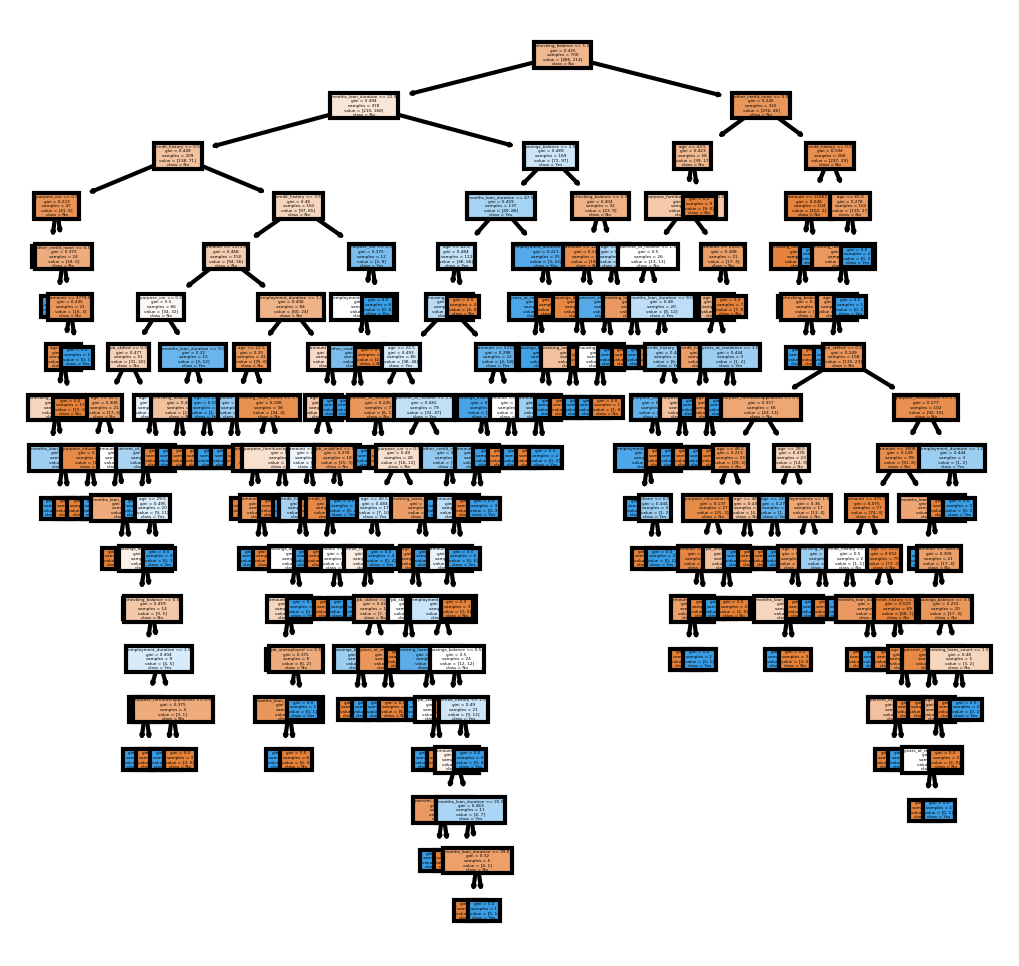

In [127]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
(plot_tree(tree, feature_names = fn, class_names=cn, filled = True))
fig.savefig('tree.png')

In [132]:
dtree=DecisionTreeClassifier('gini',max_depth=3,random_state=1)
dtree.fit(x_train,y_train)
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.75
0.7433333333333333


E:\Anacondafiles\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass criterion=gini as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [139]:
print(pd.DataFrame(dtree.feature_importances_,columns = ["Imp"], index = x_train.columns).sort_values(by='Imp',ascending=False))

                                   Imp
checking_balance              0.507427
months_loan_duration          0.164514
credit_history                0.131656
savings_balance               0.108518
other_credit_none             0.056178
age                           0.031707
purpose_education             0.000000
job_unemployed                0.000000
job_skilled                   0.000000
other_credit_store            0.000000
housing_rent                  0.000000
housing_own                   0.000000
purpose_renovations           0.000000
purpose_furniture/appliances  0.000000
purpose_car                   0.000000
purpose_car0                  0.000000
phone                         0.000000
dependents                    0.000000
existing_loans_count          0.000000
years_at_residence            0.000000
percent_of_income             0.000000
employment_duration           0.000000
amount                        0.000000
job_unskilled                 0.000000


<AxesSubplot:>

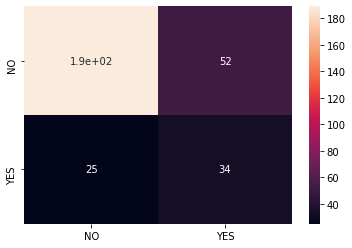

In [143]:
from sklearn .metrics import confusion_matrix
yhat=dtree.predict(x_test)
sns.heatmap(pd.DataFrame(confusion_matrix(yhat,y_test),columns=[i for i in ['NO','YES']],index=[i for i in ['NO','YES']]),annot=True)